<a href="https://colab.research.google.com/github/bedadiggelmann/bina/blob/main/BINA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

# Helper Functions



**Data Loading Functions**

This script loads data from a CSV file. Ensure that the path and the encoding match the data file specifics.

In [56]:
def load_data(filepath, encoding='ISO-8859-1', delimiter=';'):
    return pd.read_csv(filepath, encoding=encoding, delimiter=delimiter)

**Data Filtering Functions**

Filters the dataset for specific municipalities using a unique identifier contained in a column.

In [57]:
def filter_data_by_kanton_or_gemeinde(data, column_name, kanton_or_gemeinde_code):
    return data[data[column_name].str.contains(kanton_or_gemeinde_code)]

**Data Extraction Functions**

Extracts yearly data for given conditions and converts non-numeric entries appropriately.

In [58]:
def extract_yearly_data(gemeinde_data, condition_value, typ_value, start_col=4):
    yearly_data = gemeinde_data[
        (gemeinde_data["Anzahl/Anteil"] == condition_value) &
        (gemeinde_data["Leerwohnung (Typ)"].str.contains(typ_value, na=False))
    ].iloc[:, start_col:]
    yearly_data = yearly_data.replace('...', pd.NA)  # Replace '...' with NaN
    yearly_data = yearly_data.apply(pd.to_numeric, errors='coerce')  # Convert to numeric, coercing errors
    years = yearly_data.columns.tolist()  # Get the list of years (column names)
    return yearly_data.iloc[0] if not yearly_data.empty else pd.Series([pd.NA] * len(years), index=years)

**Plotting Functions**

Functions to plot time series and bar charts for visual comparisons.

In [59]:
def plot_line_chart(data_dict, title, xlabel, ylabel):
    fig, ax = plt.subplots(figsize=(14, 6))
    for label, data in data_dict.items():
        ax.plot(data.index, data.values, label=label, marker='o')
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend()
    ax.grid(True)
    plt.tight_layout()
    plt.show()


def plot_bar_chart(data_dict, title, xlabel, ylabel):
    fig, ax = plt.subplots(figsize=(14, 6))
    for label, data in data_dict.items():
        positions = range(len(data.index))
        ax.bar(positions, data.values, label=label)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_ylim([0, 3])
    ax.set_xticks(range(len(data.index)))
    ax.set_xticklabels(data.index, rotation=45)
    ax.legend()
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()

# Usage



**1. Load and Filter Data**

Load and filter data for each municipality and the canton.

In [60]:
csv_path = 'kanton_stgallen.csv'
csv_data = load_data(csv_path)

kanton_sg_data = filter_data_by_kanton_or_gemeinde(csv_data, 'Grossregion (<<) / Kanton (-) / Gemeinde (......)', 'Kanton St. Gallen')
gemeinde_haeggenschwil_data = filter_data_by_kanton_or_gemeinde(csv_data, 'Grossregion (<<) / Kanton (-) / Gemeinde (......)', '3201')
gemeinde_muolen_data = filter_data_by_kanton_or_gemeinde(csv_data, 'Grossregion (<<) / Kanton (-) / Gemeinde (......)', '3202')

**2. Extract Leerwohnungsanzahl and Leerwohnungsziffer for municipalities**


In [61]:
# Leerwohnungsanzahl
kanton_sg_leerwohnungsanzahl  = extract_yearly_data(
    kanton_sg_data,
    "Anzahl",
    "Leer stehende Wohnung - Total"
    )

haeggenschwil_leerwohnungsanzahl  = extract_yearly_data(
    gemeinde_haeggenschwil_data,
    "Anzahl",
    "Leer stehende Wohnung - Total"
    )

muolen_leerwohnungsanzahl = extract_yearly_data(
    gemeinde_muolen_data,
    "Anzahl",
    "Leer stehende Wohnung - Total"
    )

# Leerwohnungsziffer
kanton_sg_leerwohnungsziffer = extract_yearly_data(
    kanton_sg_data,
    'Leerwohnungsziffer',
    'Leer stehende Wohnung - Total'
)

haeggenschwil_leerwohnungsziffer = extract_yearly_data(
    gemeinde_haeggenschwil_data,
    'Leerwohnungsziffer',
    'Leer stehende Wohnung - Total'
)

muolen_leerwohnungsziffer = extract_yearly_data(
    gemeinde_muolen_data,
    'Leerwohnungsziffer',
    'Leer stehende Wohnung - Total'
)

**3. Plot the Data**

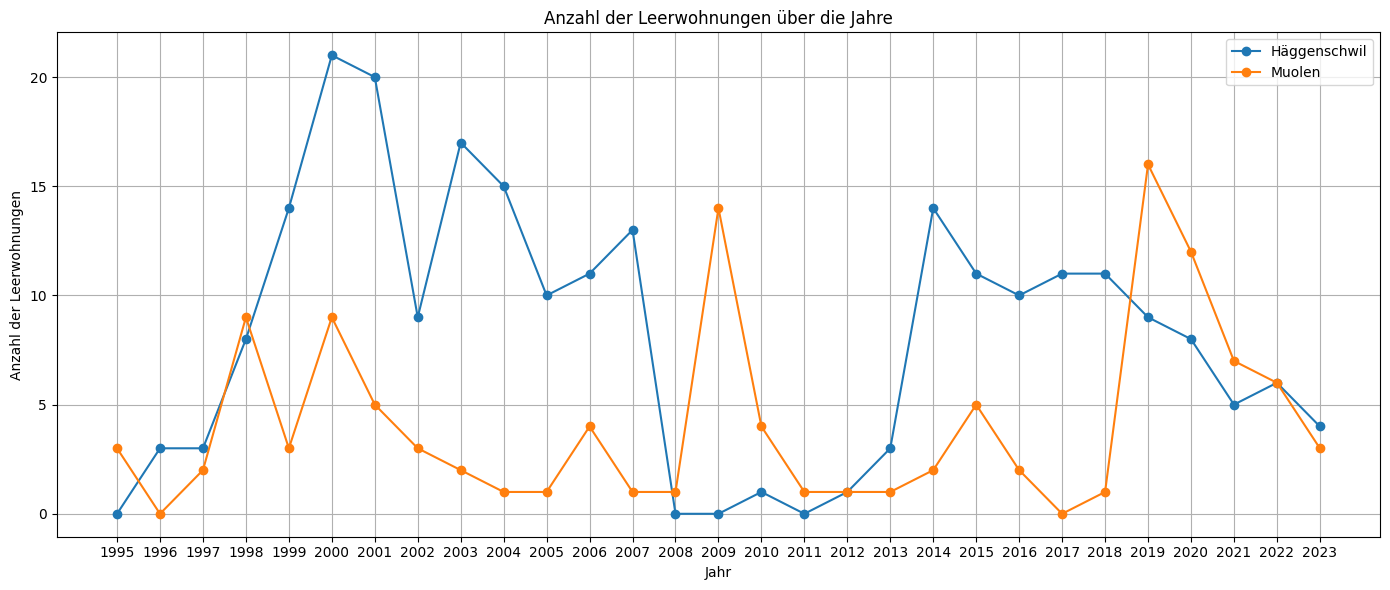

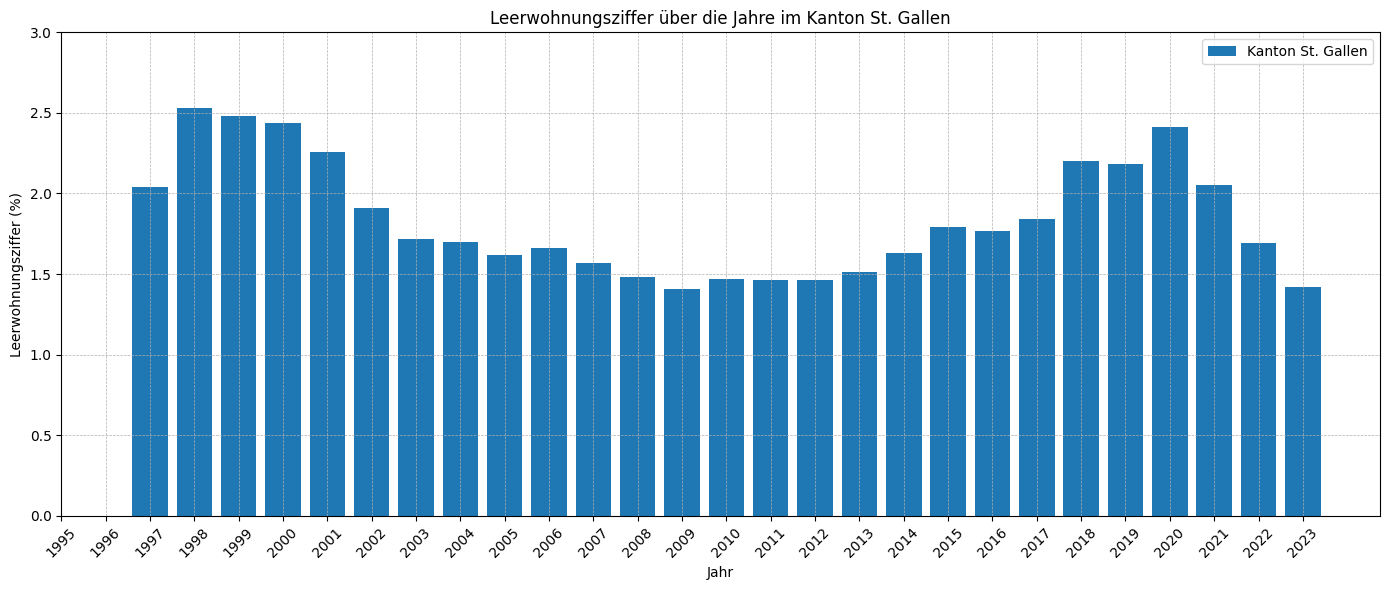

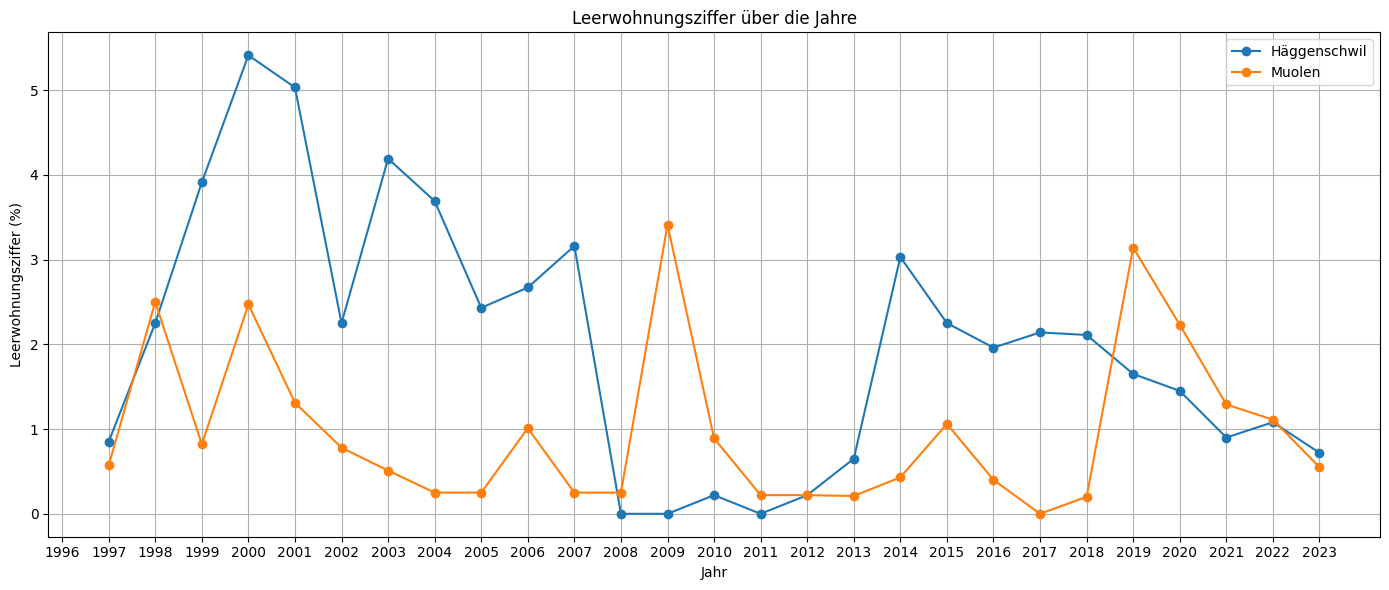

In [62]:


# Anzahl der Leerwohnungen über die Jahre
plot_line_chart(
    {
        'Häggenschwil': haeggenschwil_leerwohnungsanzahl,
        'Muolen': muolen_leerwohnungsanzahl
    },
    'Anzahl der Leerwohnungen über die Jahre',
    'Jahr',
    'Anzahl der Leerwohnungen'
)

# Leerwohnungsziffer über die Jahre
plot_bar_chart(
    {
        'Kanton St. Gallen': kanton_sg_leerwohnungsziffer
    },
    'Leerwohnungsziffer über die Jahre im Kanton St. Gallen',
    'Jahr',
    'Leerwohnungsziffer (%)'
)

plot_line_chart(
    {
        'Häggenschwil': haeggenschwil_leerwohnungsziffer,
        'Muolen': muolen_leerwohnungsziffer
    },
    'Leerwohnungsziffer über die Jahre',
    'Jahr',
    'Leerwohnungsziffer (%)'
)
